In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from math import sin, pi

seq_len = 200

In [3]:
df = pd.read_csv('./s&p500_3years.csv', delimiter=',')
# Convert str to datetime in column "date"
df["date"] = pd.Series([datetime.strptime(x[:-6], "%Y-%m-%d %H:%M:%S") for x in df["date"]])
df.head()

,date,open,high,low,close,volume,is_ext
0,2018-04-02 13:00:00,190,190,188,189,9892,False
1,2018-04-02 14:00:00,188,188,186,186,34335,False
2,2018-04-02 15:00:00,186,186,184,185,35470,True
3,2018-04-02 16:00:00,185,187,184,185,25025,False
4,2018-04-02 17:00:00,185,186,184,184,23102,True


In [6]:
df["day_of_week"] = df["date"].apply(lambda x: sin(2*pi * x.weekday() / 7))
# df['day_of_year'] = df['date'].apply(lambda x: sin(2*pi * x.timetuple().tm_yday / 365))
df['time_of_day'] = df['date'].apply(lambda x: sin(2*pi*((x.time().hour - 7) * 60 + x.time().minute) / (15*60)))
df.head()

,date,open,high,low,close,volume,is_ext,day_of_week,time_of_day
0,2018-04-02 13:00:00,190,190,188,189,9892,False,0.0,0.587785
1,2018-04-02 14:00:00,188,188,186,186,34335,False,0.0,0.207912
2,2018-04-02 15:00:00,186,186,184,185,35470,True,0.0,-0.207912
3,2018-04-02 16:00:00,185,187,184,185,25025,False,0.0,-0.587785
4,2018-04-02 17:00:00,185,186,184,184,23102,True,0.0,-0.866025


In [7]:
'''Normalize price columns'''

df['open'] = (df['open']-np.mean(df['open']))/np.std(df['open'])
df['high'] = (df['high']-np.mean(df['high']))/np.std(df['high'])
df['low'] = (df['low']-np.mean(df['low']))/np.std(df['low']) 
df['close'] = (df['close']-np.mean(df['close']))/np.std(df['close'])
df['volume'] = (df['volume']-np.mean(df['volume']))/np.std(df['volume'])

df.head()

,date,open,high,low,close,volume,is_ext,day_of_week,time_of_day
0,2018-04-02 13:00:00,-1.507780,-1.515642,-1.522882,-1.519477,-0.342147,False,0.0,0.587785
1,2018-04-02 14:00:00,-1.531133,-1.538941,-1.546295,-1.554513,0.777023,False,0.0,0.207912
2,2018-04-02 15:00:00,-1.554485,-1.562241,-1.569708,-1.566192,0.828991,True,0.0,-0.207912
3,2018-04-02 16:00:00,-1.566162,-1.550591,-1.569708,-1.566192,0.350747,False,0.0,-0.587785
4,2018-04-02 17:00:00,-1.566162,-1.562241,-1.569708,-1.577870,0.262698,True,0.0,-0.866025


### Разделим датасет на тренировочный, валидационный и тестовый

In [8]:
times = df.index.values
last_10pct = df.index.values[-int(0.1*len(times))] # Last 10% of series
last_20pct = df.index.values[-int(0.2*len(times))] # Last 20% of series

In [9]:
###############################################################################
'''Create training, validation and test split'''

df_train = df[(df.index < last_20pct)]  # Training data are 80% of total data
df_val = df[(df.index >= last_20pct) & (df.index < last_10pct)]
df_test = df[(df.index >= last_10pct)]

# Remove date column
df_train.drop(columns=['date', "is_ext"], inplace=True)
df_val.drop(columns=['date', "is_ext"], inplace=True)
df_test.drop(columns=['date', "is_ext"], inplace=True)

# Convert pandas columns into arrays
train_data = df_train.values
val_data = df_val.values
test_data = df_test.values
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))

Training data shape: (8761, 7)
Validation data shape: (1095, 7)
Test data shape: (1095, 7)


C:\Users\mrsca\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


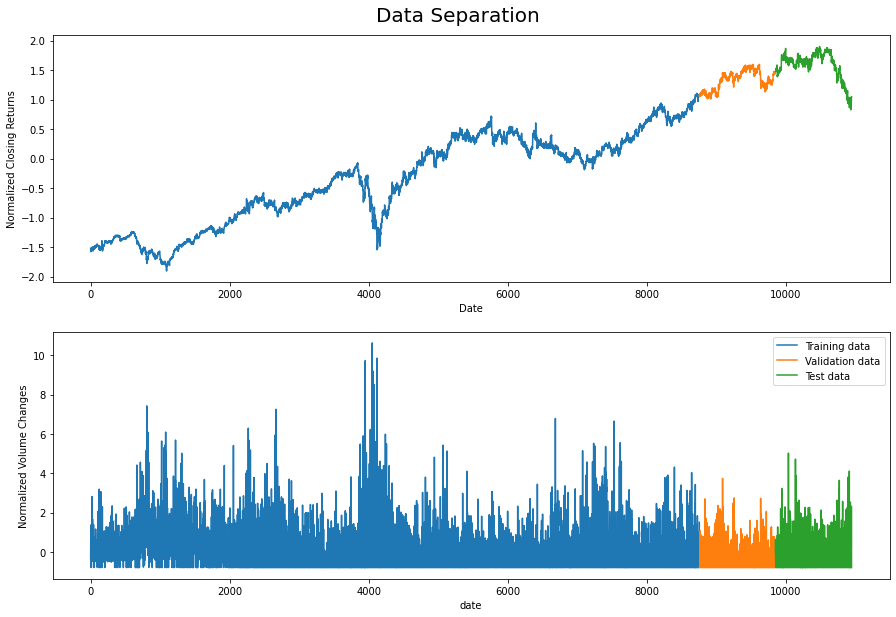

In [10]:
fig = plt.figure(figsize=(15,10))
st = fig.suptitle("Data Separation", fontsize=20)
st.set_y(0.92)

###############################################################################

ax1 = fig.add_subplot(211)
ax1.plot(np.arange(train_data.shape[0]), df_train['close'], label='Training data')

ax1.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), df_val['close'], label='Validation data')

ax1.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['close'], label='Test data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Closing Returns')

###############################################################################

ax2 = fig.add_subplot(212)
ax2.plot(np.arange(train_data.shape[0]), df_train['volume'], label='Training data')

ax2.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), df_val['volume'], label='Validation data')

ax2.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['volume'], label='Test data')
ax2.set_xlabel('date')
ax2.set_ylabel('Normalized Volume Changes')

plt.legend(loc='best')
plt.show()

In [12]:
# Training data
X_train, y_train = [], []
for i in range(seq_len, len(train_data)):
  X_train.append(train_data[i-seq_len:i]) # Chunks of training data with a length of [seq_len] df-rows
  y_train.append(train_data[:, 3][i]) #Value of 4th column (Close Price) of df-row [seq_len + 1]
X_train, y_train = np.array(X_train), np.array(y_train)

###############################################################################

# Validation data
X_val, y_val = [], []
for i in range(seq_len, len(val_data)):
    X_val.append(val_data[i-seq_len:i])
    y_val.append(val_data[:, 3][i])
X_val, y_val = np.array(X_val), np.array(y_val)

###############################################################################

# Test data
X_test, y_test = [], []
for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i])
    y_test.append(test_data[:, 3][i])    
X_test, y_test = np.array(X_test), np.array(y_test)

## Создание и обучение модели

In [13]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
print('Tensorflow version: {}'.format(tf.__version__))
import warnings
warnings.filterwarnings('ignore')

Tensorflow version: 2.8.0


In [14]:
def create_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.LSTM(64, input_shape=(seq_len, 7), return_sequences=True))
  model.add(tf.keras.layers.LSTM(64, return_sequences=True))
  model.add(tf.keras.layers.LSTM(32))
  model.add(tf.keras.layers.Dense(1))#, activation=tf.nn.relu))
  model.compile(optimizer="adam", loss="mean_squared_error")
  return model

### Обучение

In [ ]:
model = create_model()

model.summary()

model.fit(X_train, y_train,
              batch_size=1024,
              epochs=30,
              validation_data=(X_val, y_val),)

In [15]:
# Get predictions
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

NameError: name 'model' is not defined

In [ ]:
'''Display results'''

fig = plt.figure(figsize=(15,15))
st = fig.suptitle("Moving Average - LSTM Model", fontsize=22)
st.set_y(1.02)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(train_data[:int(2*(seq_len-8)), 3], label='IBM Closing Returns')
ax11.plot(np.arange(seq_len-8, int(2*(seq_len-8))), train_pred[:(seq_len-8)], label='Predicted IBM Closing Returns')
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Date')
ax11.set_ylabel('S&P500 Closing Returns')

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(val_data[:int(2*(seq_len-8)), 3], label='IBM Closing Returns')
ax21.plot(np.arange(seq_len-8, int(2*(seq_len-8))),val_pred[:(seq_len-8)], label='Predicted IBM Closing Returns')
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Date')
ax21.set_ylabel('S&P500 Closing Returns')

#Plot test data results
ax31 = fig.add_subplot(313)
ax31.plot(test_data[:int(2*(seq_len-8)), 3], label='IBM Closing Returns')
ax31.plot(np.arange(seq_len-8, int(2*(seq_len-8))),test_pred[:(seq_len-8)], label='Predicted IBM Closing Returns')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Date')
ax31.set_ylabel('S&P500 Closing Returns')
 
plt.tight_layout()
plt.legend(loc='best')